In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from scipy.ndimage import gaussian_gradient_magnitude
import imageio
import pandas as pd
import random
import nltk
#nltk.download('punkt')

In [3]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
Stopword = nltk.corpus.stopwords.words('english')
newStopword = ['!',',','.','?','-s','-ly','</s>','s','(',')','I','He','They','’','n\'t','We','usually','Some','used']
Stopword.extend(newStopword)
#print(Stopword)

# 讀語音辨識出來的txt檔

In [4]:
file = 'result.txt' #語音辨識結果
with open(file,'r',encoding="utf-8") as f:
            text = f.readlines()
f.close()
#進行斷詞 餵入語音辨識的list
text_list = nltk.word_tokenize(text[0])
filtered_words = [word for word in text_list if word not in Stopword] #filtered是斷完詞的結果
#計算頻率
def count_seq(list):
    count_df = pd.DataFrame(list,columns=['text'])
    count_df['count']=1
    set_freq = count_df.groupby('text')['count'].sum().sort_values(ascending=False)
    set_freq = pd.DataFrame(set_freq)
    set_freq = set_freq[~set_freq['count'].isin([1,2])]
    return set_freq

freq = count_seq(filtered_words)
freq.reset_index(inplace = True)
#print the 50 most popular words
#print(freq.head(10))

In [5]:
#需要Button控制下載
freq.to_csv('Freq.csv',index=False)

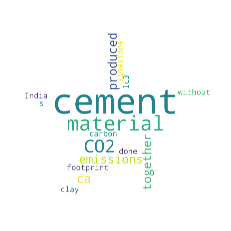

In [73]:
def generate_wordcloud(word_list,mask_pic):
    wc_list=' '.join(word_list)

    #背景色隨機
    color=['#D0D0D0','white','#D9FFFF','#FFD2D2','#E6CAFF','#E8FFC4','#C4E1E1','#EBD6D6','#EBD3E8','#FFF0AC','black']
    a = random.randint(0,len(color))
    ran = random.randint(10,50)
    if mask_pic == 'preset':
        wc = WordCloud(max_words=500,
                       max_font_size=50,
                       min_font_size=10,
                       scale=20,
                       background_color=color[a],
                       prefer_horizontal=0.9,
                       random_state=ran,
                       relative_scaling=1)
    else:
        mask_img = imageio.imread('./mask/'+mask)

        wc = WordCloud(max_words=500,
                       max_font_size=50,
                       min_font_size=10,
                       scale=20,
                       background_color=color[a],
                       mask=mask_img,
                       prefer_horizontal=0.9,
                       random_state=ran,
                       relative_scaling=1)

    wc.generate(wc_list)
    # Plot 顯示在網頁上面
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    
#要哪種圖形 可以從web介面的button改變
generate_wordcloud(filtered_words,'circle')

#存檔 web介面決定是否下載
#name="C:/Users/User/Desktop/敏捷/test.jpg"
#wc.to_file(name)